# Flow Of Analysis

1. Data cleaning and data manipulation.
 - Check and handle duplicate data.
 - Check and handle NA values and missing values.
 - Drop columns. If it contains large amount of missing values and not used for analysis.
 - Imputation of the values.
2. EDA
 - Univariate data analysis,values_count,distribution of variable.
 - Bivariate data analysis,correlation coefficients and pattern between the variable.
3. Feature Scaling and Creating Dummy Variable.
4. Classification Technique: Logistic regression used for the model making and prediction.
5. Validation of the model.

## Importing Libraries

In [1]:
#Importing Librariers
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

In [2]:
#Imporing the data set
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Handling Missing Values

In [6]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### As there are many null values greater than 3000 we will drop them.

In [7]:
for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [8]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Handling Select value which is good as null.


In [9]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [11]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [12]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [13]:
#Handling Select value which is good as null so dropping them
leads.drop(['Lead Profile', 'How did you hear about X Education','City'], axis = 1, inplace = True)

In [14]:
#Columns which have high null values so dropping them 
leads.drop(['Country','What matters most to you in choosing a course'], axis = 1, inplace=True)

In [15]:
#Columns which are not required for analysis so dropping them
leads.drop(['Prospect ID','Lead Number','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'A free copy of Mastering The Interview','Get updates on DM Content',
           'I agree to pay the amount through cheque'], axis = 1, inplace=True)

In [16]:
leads.isnull().sum()

Lead Origin                           0
Lead Source                          36
Do Not Email                          0
Converted                             0
TotalVisits                         137
Total Time Spent on Website           0
Page Views Per Visit                137
Last Activity                       103
Specialization                     1438
What is your current occupation    2690
Last Notable Activity                 0
dtype: int64

In [17]:
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]
leads = leads[~pd.isnull(leads['Last Activity'])]
leads = leads[~pd.isnull(leads['Specialization'])]
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [18]:
leads.isnull().sum()

Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

In [19]:
# Checking percentage of missing values after removing the missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

In [20]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6373 non-null   object 
 1   Lead Source                      6373 non-null   object 
 2   Do Not Email                     6373 non-null   object 
 3   Converted                        6373 non-null   int64  
 4   TotalVisits                      6373 non-null   float64
 5   Total Time Spent on Website      6373 non-null   int64  
 6   Page Views Per Visit             6373 non-null   float64
 7   Last Activity                    6373 non-null   object 
 8   Specialization                   6373 non-null   object 
 9   What is your current occupation  6373 non-null   object 
 10  Last Notable Activity            6373 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 597.5+ KB


##### Now we don't have any missing values

In [21]:
print(len(leads.index)/9240)

0.6897186147186147


###### We still have around 69% of the rows which seems good enough.

# Data Preperation
## Creating Dummy Variables

In [22]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

In [23]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [24]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [25]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'Last Notable Activity'], 1)

In [26]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [29]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [30]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

48.093519535540565

### Looking For Coorelation

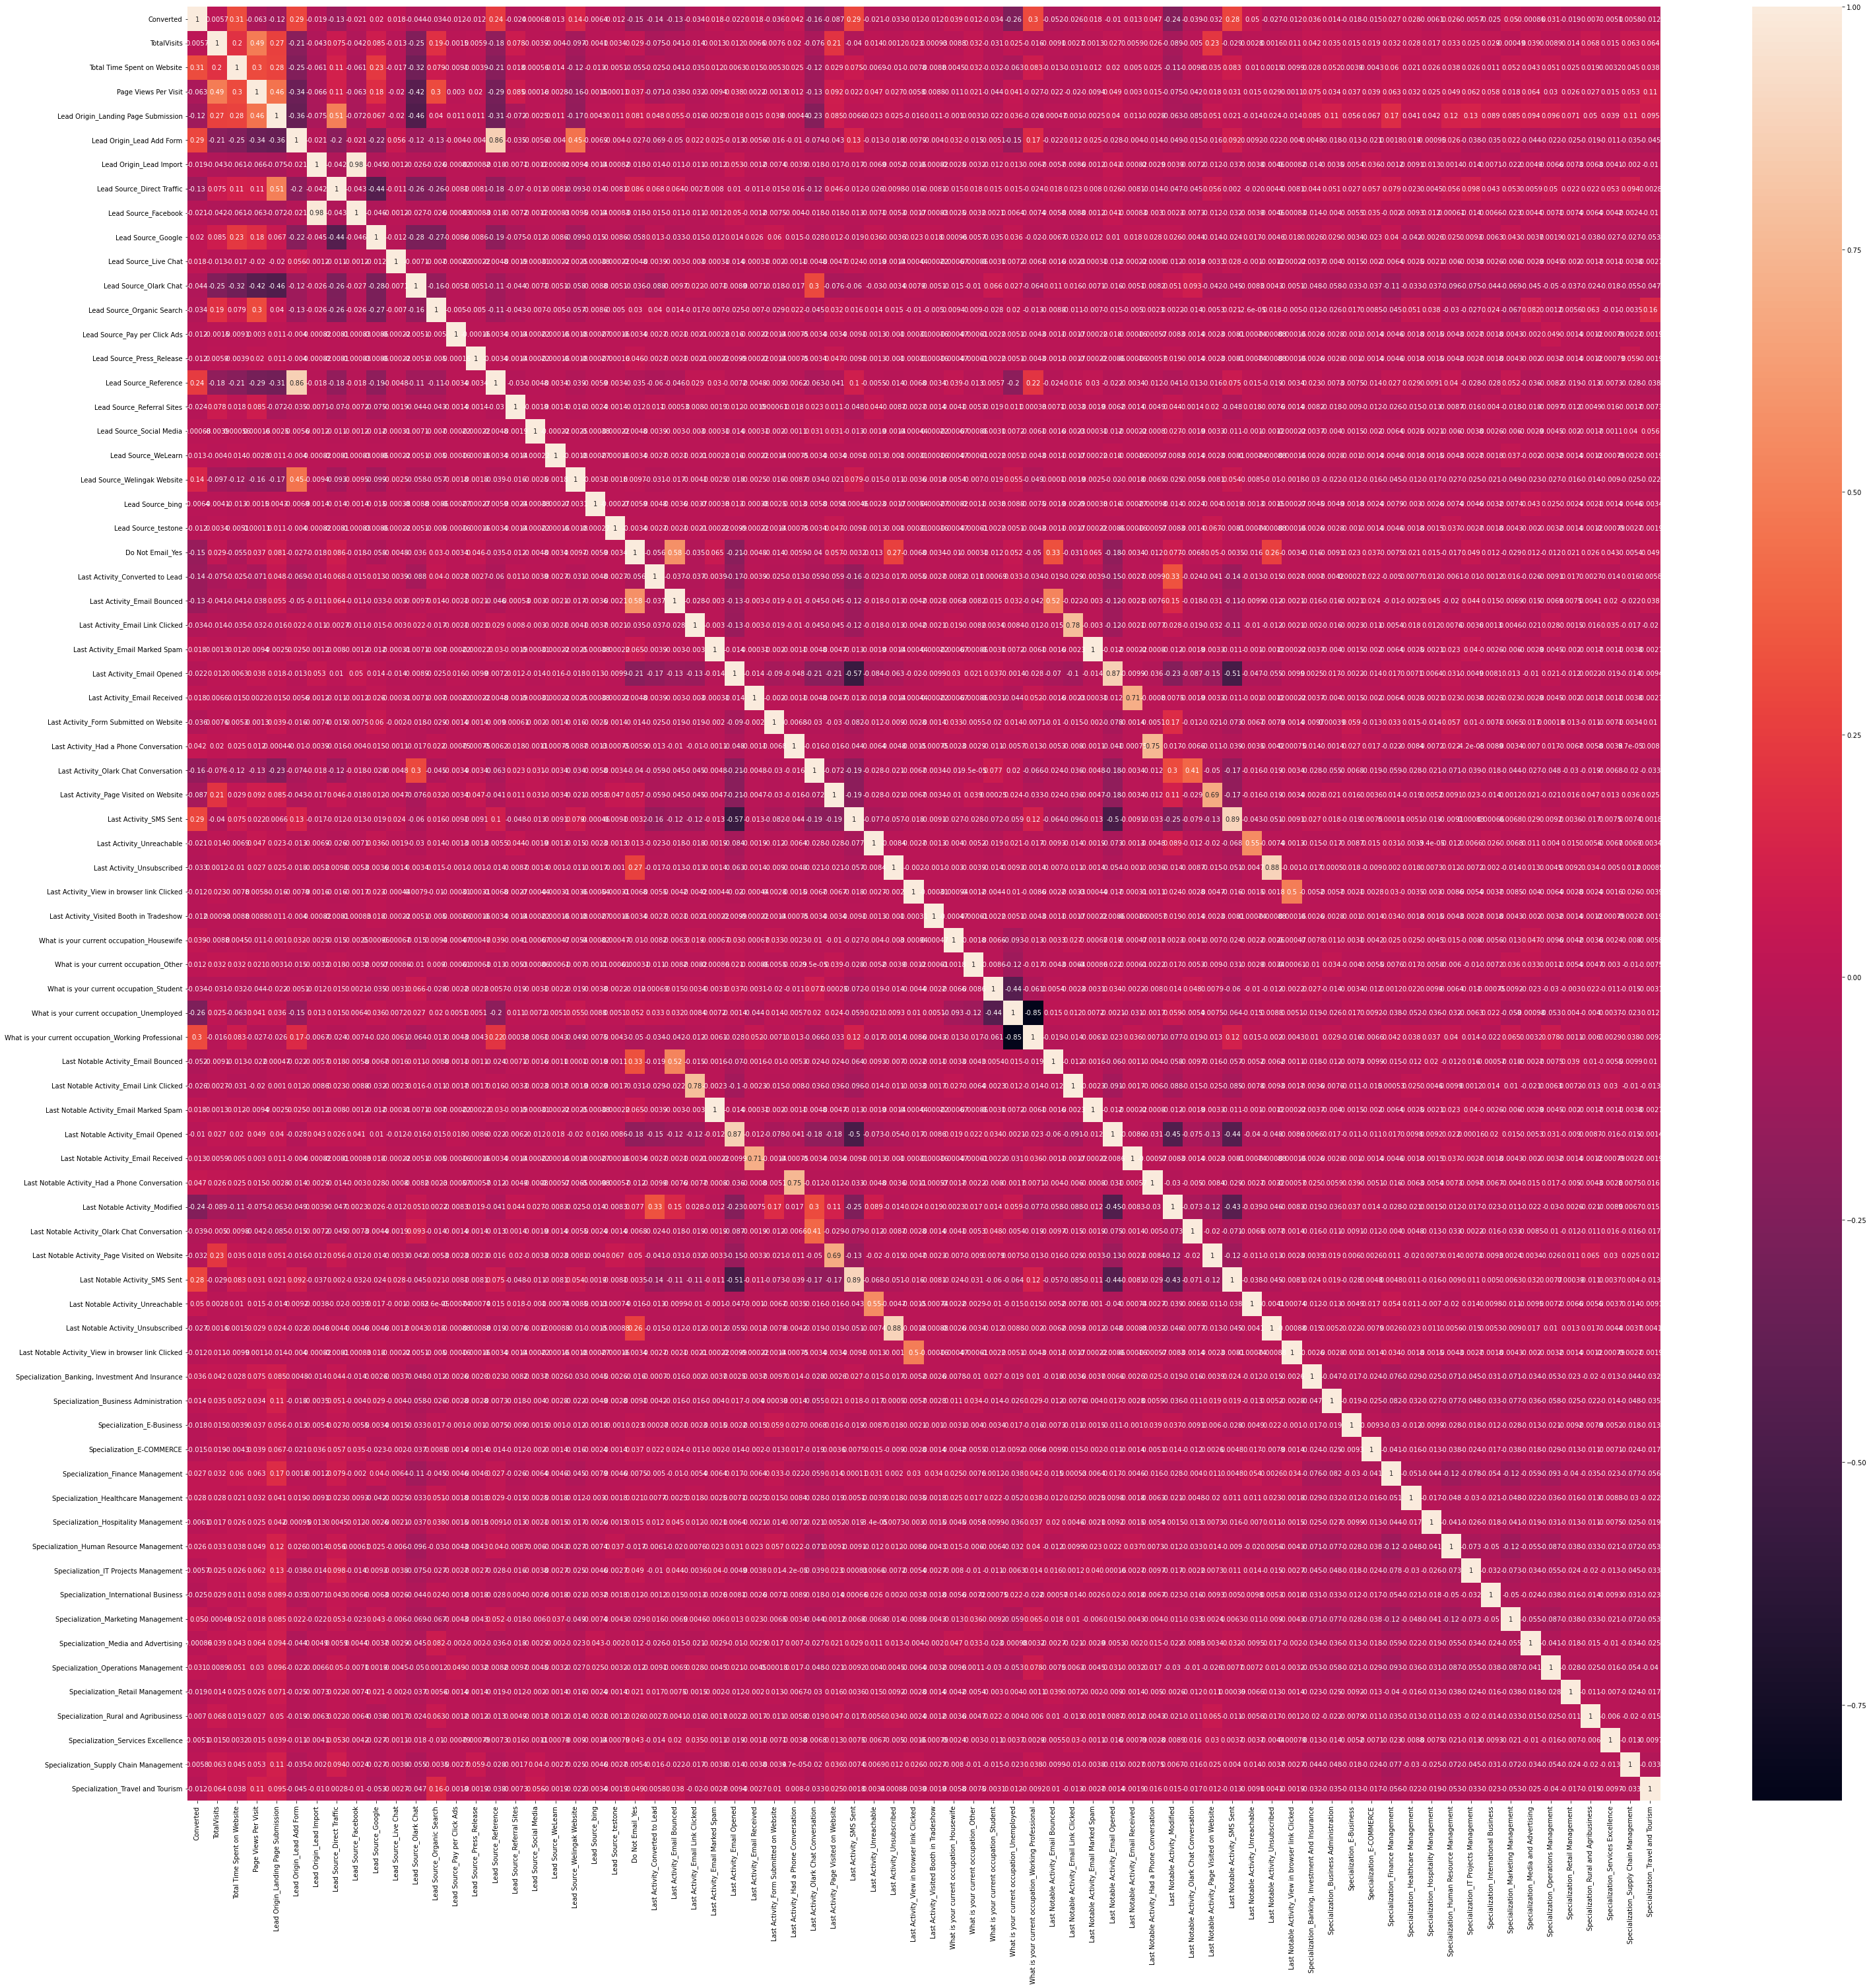

In [32]:
plt.figure(figsize = (50,50))        
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [33]:
#Data in heatmap is difficult to read 
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


In [34]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4393
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 08 Jan 2023   Deviance:                   1.1292e+05
Time:                        17:19:59   Pearson chi2:                 5.52e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -4.175e+15   8.84e+07  -4.72e+07      0.000   -4.18e+15   -4.18e+15
TotalVisits                                           4.277e+15   5.39e+07   7.93e+07      0.000    4.28e+15    4.28e+15
Total Time Spent on Website                           3.161e+15   4.67e+06   6.78e+08      0.000    3.16e+15    3.16e+15
Page Views Per Visit                                 -1.269e+15   1.16e+07   -1.1e+08      0.000   -1.27e+15   -1.27e+15
Lead Origin_Landing Page Submission                   2.976e+14   3.75e+06   7.93e+07      0.000    2.98e+14    2.98e+14
Lead Origin_Lead Add Form                             4.294e+15   4.77e+07   9.01e+07      0.000    4.29e+15    4.29e+15
Lead Origin_Lead Import                               3.538e+15   4.21e+07   8.41e+07      0.000    3.54e+15    3.54e+15
Lead Source_Direct Traffic                            7.674e+15   8.25e+07    9.3e+07      0.000    7.67e+15    7.67e+15
Lead Source_Facebook                                  3.538e+15   4.21e+07   8.41e+07      0.000    3.54e+15    3.54e+15
Lead Source_Google                                    8.026e+15   8.25e+07   9.73e+07      0.000    8.03e+15    8.03e+15
Lead Source_Live Chat                                 9.519e+15   8.24e+07   1.15e+08      0.000    9.52e+15    9.52e+15
Lead Source_Olark Chat                                7.567e+15   8.25e+07   9.17e+07      0.000    7.57e+15    7.57e+15
Lead Source_Organic Search                            7.986e+15   8.26e+07   9.67e+07      0.000    7.99e+15    7.99e+15
Lead Source_Pay per Click Ads                         3.513e+15   1.06e+08    3.3e+07      0.000    3.51e+15    3.51e+15
Lead Source_Press_Release                              3.52e+15   1.07e+08   3.29e+07      0.000    3.52e+15    3.52e+15
Lead Source_Reference                                 5.497e+15   6.74e+07   8.16e+07      0.000     5.5e+15     5.5e+15
Lead Source_Referral Sites                            8.212e+15   8.31e+07   9.88e+07      0.000    8.21e+15    8.21e+15
Lead Source_Social Media                              -101.5925   1.26e-06  -8.06e+07      0.000    -101.592    -101.592
Lead Source_WeLearn                                    1.12e+16   1.06e+08   1.05e+08      0.000    1.12e+16    1.12e+16
Lead Source_Welingak Website                          5.488e+15   6.77e+07   8.11e+07      0.000    5.49e+15    5.49e+15
Lead Source_bing                                      3.963e+15   9.52e+07   4.16e+07      0.000    3.96e+15    3.96e+15
Lead Source_testone                                   8.058e+15   1.06e+08   7.57e+07      0.000    8.06e+15    8.06e+15
Do Not Email_Yes                                      6.00

In [35]:
logreg = LogisticRegression()

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [37]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True])

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),

In [39]:
col = X_train.columns[rfe.support_]

In [40]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_

##### Assessing the model with StatsModels

In [41]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4424
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.7
Date:                Sun, 08 Jan 2023   Deviance:                       3965.3
Time:                        17:20:01   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5760      0.647      0.890      0.373      -0.692       1.845
TotalVisits                                             11.8991      3.325      3.579      0.000       5.383      18.416
Total Time Spent on Website                              4.3810      0.189     23.166      0.000       4.010       4.752
Page Views Per Visit                                    -1.0857      0.454     -2.389      0.017      -1.976      -0.195
Lead Origin_Landing Page Submission                     -0.8031      0.123     -6.527      0.000      -1.044      -0.562
Lead Origin_Lead Add Form                                2.1245      1.156      1.837      0.066      -0.142       4.391
Lead Source_Olark Chat                                   1.1274      0.155      7.276      0.000       0.824       1.431
Lead Source_Reference                                    1.4284      1.178      1.213      0.225      -0.880       3.737
Lead Source_Welingak Website                             3.9017      1.531      2.548      0.011       0.901       6.903
Do Not Email_Yes                                        -1.4726      0.227     -6.501      0.000      -1.917      -1.029
Last Activity_Converted to Lead                         -0.9208      0.235     -3.921      0.000      -1.381      -0.460
Last Activity_Email Bounced                             -0.9804      0.422     -2.323      0.020      -1.807      -0.153
Last Activity_Had a Phone Conversation                   0.9592      0.986      0.973      0.331      -0.973       2.892
Last Activity_Olark Chat Conversation                   -1.3402      0.200     -6.699      0.000      -1.732      -0.948
Last Activity_Page Visited on Website                   -1.0455      0.176     -5.937      0.000      -1.391      -0.700
What is your current occupation_Housewife               22.5404   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
What is your current occupation_Student                 -1.1564      0.666     -1.738      0.082      -2.461       0.148
What is your current occupation_Unemployed              -1.3237      0.627     -2.112      0.035      -2.552      -0.095
What is your current occupation_Working Professional     1.2349      0.655      1.885      0.059      -0.049       2.519
Last Notable Activity_Email Link Clicked                -1.5511      0.284     -5.457      0.000      -2.108      -0.994
Last Notable Activity_Email Opened                      -1.0060      0.098    -10.280      0.000      -1.198      -0.814
Last Notable Activity_Had a Phone Conversation          21.8671   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Last Notable Activity_Modified                          -1

In [42]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.330013
218     0.133141
4171    0.043886
4037    0.348346
3660    0.970643
207     0.082179
2044    0.099575
6411    0.952203
6498    0.038191
2085    0.986245
dtype: float64

In [43]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33001343, 0.1331413 , 0.04388635, 0.34834599, 0.97064262,
       0.08217933, 0.09957532, 0.95220308, 0.03819125, 0.98624506])

In [44]:
y_train_pred[:10]

array([0.33001343, 0.1331413 , 0.04388635, 0.34834599, 0.97064262,
       0.08217933, 0.09957532, 0.95220308, 0.03819125, 0.98624506])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [45]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final.head()

,converted,converted_Prob
0,0,0.330013
1,0,0.133141
2,1,0.043886
3,1,0.348346
4,1,0.970643


##### Creating new column 'predicted' with 1 if Coverted_Prob > 0.5 else 0

In [46]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,converted_Prob,predicted
0,0,0.330013,0
1,0,0.133141,0
2,1,0.043886,0
3,1,0.348346,0
4,1,0.970643,1


In [47]:
from sklearn import metrics

In [48]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[1934  378]
 [ 521 1628]]


In [49]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7984756780990809


## Checking VIF

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.71
6,Lead Source_Reference,65.38
7,Lead Source_Welingak Website,20.08
16,What is your current occupation_Unemployed,11.06
3,Lead Origin_Landing Page Submission,5.40
2,Page Views Per Visit,4.63
20,Last Notable Activity_Had a Phone Conversation,2.46
11,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
17,What is your current occupation_Working Profes...,2.42


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. 

In [52]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administr

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4425
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1984.8
Date:                Sun, 08 Jan 2023   Deviance:                       3969.6
Time:                        17:20:04   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6063      0.646      0.938      0.348      -0.661       1.873
TotalVisits                                             11.7539      3.309      3.552      0.000       5.268      18.240
Total Time Spent on Website                              4.3674      0.189     23.156      0.000       3.998       4.737
Page Views Per Visit                                    -1.1282      0.454     -2.487      0.013      -2.017      -0.239
Lead Origin_Landing Page Submission                     -0.8191      0.123     -6.667      0.000      -1.060      -0.578
Lead Source_Olark Chat                                   1.1029      0.154      7.159      0.000       0.801       1.405
Lead Source_Reference                                    3.5234      0.285     12.375      0.000       2.965       4.081
Lead Source_Welingak Website                             5.9991      1.017      5.897      0.000       4.005       7.993
Do Not Email_Yes                                        -1.4748      0.226     -6.515      0.000      -1.918      -1.031
Last Activity_Converted to Lead                         -0.9327      0.235     -3.975      0.000      -1.393      -0.473
Last Activity_Email Bounced                             -0.9844      0.422     -2.334      0.020      -1.811      -0.158
Last Activity_Had a Phone Conversation                   0.9499      0.985      0.964      0.335      -0.981       2.881
Last Activity_Olark Chat Conversation                   -1.3473      0.200     -6.738      0.000      -1.739      -0.955
Last Activity_Page Visited on Website                   -1.0433      0.176     -5.942      0.000      -1.387      -0.699
What is your current occupation_Housewife               22.5328   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
What is your current occupation_Student                 -1.1607      0.665     -1.745      0.081      -2.464       0.143
What is your current occupation_Unemployed              -1.3253      0.626     -2.117      0.034      -2.552      -0.098
What is your current occupation_Working Professional     1.2298      0.655      1.878      0.060      -0.053       2.513
Last Notable Activity_Email Link Clicked                -1.5549      0.284     -5.472      0.000      -2.112      -0.998
Last Notable Activity_Email Opened                      -1.0093      0.098    -10.318      0.000      -1.201      -0.818
Last Notable Activity_Had a Phone Conversation          21.8754   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Last Notable Activity_Modified                          -1.2082      0.111    -10.881      0.000      -1.426      -0.991
Last Notable Activity_Unreachable                        1

In [54]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7971306881865052


In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,11.01
3,Lead Origin_Landing Page Submission,5.39
2,Page Views Per Visit,4.63
19,Last Notable Activity_Had a Phone Conversation,2.46
10,Last Activity_Had a Phone Conversation,2.46
1,Total Time Spent on Website,2.43
16,What is your current occupation_Working Profes...,2.41
20,Last Notable Activity_Modified,2.38
4,Lead Source_Olark Chat,2.26
18,Last Notable Activity_Email Opened,2.08


In [56]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Speciali

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.2
Date:                Sun, 08 Jan 2023   Deviance:                       3974.4
Time:                        17:20:05   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7308      0.140     -5.222      0.000      -1.005      -0.456
TotalVisits                                             12.1003      3.336      3.627      0.000       5.562      18.638
Total Time Spent on Website                              4.3683      0.189     23.171      0.000       3.999       4.738
Page Views Per Visit                                    -1.1078      0.454     -2.442      0.015      -1.997      -0.219
Lead Origin_Landing Page Submission                     -0.8246      0.123     -6.717      0.000      -1.065      -0.584
Lead Source_Olark Chat                                   1.1088      0.154      7.198      0.000       0.807       1.411
Lead Source_Reference                                    3.5281      0.285     12.397      0.000       2.970       4.086
Lead Source_Welingak Website                             6.0024      1.017      5.900      0.000       4.009       7.996
Do Not Email_Yes                                        -1.4660      0.226     -6.475      0.000      -1.910      -1.022
Last Activity_Converted to Lead                         -0.9318      0.235     -3.972      0.000      -1.392      -0.472
Last Activity_Email Bounced                             -0.9903      0.422     -2.347      0.019      -1.817      -0.163
Last Activity_Had a Phone Conversation                   0.9468      0.985      0.961      0.337      -0.984       2.878
Last Activity_Olark Chat Conversation                   -1.3488      0.200     -6.744      0.000      -1.741      -0.957
Last Activity_Page Visited on Website                   -1.0189      0.175     -5.816      0.000      -1.362      -0.676
What is your current occupation_Housewife               23.8524   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
What is your current occupation_Student                  0.1584      0.231      0.685      0.493      -0.295       0.612
What is your current occupation_Working Professional     2.5472      0.203     12.561      0.000       2.150       2.945
Last Notable Activity_Email Link Clicked                -1.5541      0.284     -5.469      0.000      -2.111      -0.997
Last Notable Activity_Email Opened                      -0.9968      0.098    -10.215      0.000      -1.188      -0.806
Last Notable Activity_Had a Phone Conversation          21.8713   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Last Notable Activity_Modified                          -1.2023      0.111    -10.834      0.000      -1.420      -0.985
Last Notable Activity_Unreachable                        1.4214      0.807      1.761      0.078      -0.160       3.003
Specialization_Banking, Investment And Insurance         1

In [58]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7982515131136516


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.85
2,Page Views Per Visit,3.82
10,Last Activity_Had a Phone Conversation,2.46
18,Last Notable Activity_Had a Phone Conversation,2.46
19,Last Notable Activity_Modified,2.16
1,Total Time Spent on Website,2.10
0,TotalVisits,1.89
17,Last Notable Activity_Email Opened,1.78
7,Do Not Email_Yes,1.70
25,Specialization_Finance Management,1.67


In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4426
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.2
Date:                Sun, 08 Jan 2023   Deviance:                       3974.4
Time:                        17:20:07   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7308      0.140     -5.222      0.000      -1.005      -0.456
TotalVisits                                             12.1003      3.336      3.627      0.000       5.562      18.638
Total Time Spent on Website                              4.3683      0.189     23.171      0.000       3.999       4.738
Page Views Per Visit                                    -1.1078      0.454     -2.442      0.015      -1.997      -0.219
Lead Origin_Landing Page Submission                     -0.8246      0.123     -6.717      0.000      -1.065      -0.584
Lead Source_Olark Chat                                   1.1088      0.154      7.198      0.000       0.807       1.411
Lead Source_Reference                                    3.5281      0.285     12.397      0.000       2.970       4.086
Lead Source_Welingak Website                             6.0024      1.017      5.900      0.000       4.009       7.996
Do Not Email_Yes                                        -1.4660      0.226     -6.475      0.000      -1.910      -1.022
Last Activity_Converted to Lead                         -0.9318      0.235     -3.972      0.000      -1.392      -0.472
Last Activity_Email Bounced                             -0.9903      0.422     -2.347      0.019      -1.817      -0.163
Last Activity_Had a Phone Conversation                   0.9468      0.985      0.961      0.337      -0.984       2.878
Last Activity_Olark Chat Conversation                   -1.3488      0.200     -6.744      0.000      -1.741      -0.957
Last Activity_Page Visited on Website                   -1.0189      0.175     -5.816      0.000      -1.362      -0.676
What is your current occupation_Housewife               23.8524   2.42e+04      0.001      0.999   -4.74e+04    4.74e+04
What is your current occupation_Student                  0.1584      0.231      0.685      0.493      -0.295       0.612
What is your current occupation_Working Professional     2.5472      0.203     12.561      0.000       2.150       2.945
Last Notable Activity_Email Link Clicked                -1.5541      0.284     -5.469      0.000      -2.111      -0.997
Last Notable Activity_Email Opened                      -0.9968      0.098    -10.215      0.000      -1.188      -0.806
Last Notable Activity_Had a Phone Conversation          21.8713   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Last Notable Activity_Modified                          -1.2023      0.111    -10.834      0.000      -1.420      -0.985
Last Notable Activity_Unreachable                        1.4214      0.807      1.761      0.078      -0.160       3.003
Specialization_Banking, Investment And Insurance         1

All the VIF value are less than 5 which are good.
Now we will check the p-value 
We will drop p-value which have higher value

In [61]:
col = col.drop('What is your current occupation_Housewife')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Manageme

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4427
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1993.4
Date:                Sun, 08 Jan 2023   Deviance:                       3986.8
Time:                        17:20:07   Pearson chi2:                 4.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7257      0.140     -5.191      0.000      -1.000      -0.452
TotalVisits                                             12.0061      3.322      3.614      0.000       5.495      18.517
Total Time Spent on Website                              4.3664      0.188     23.196      0.000       3.997       4.735
Page Views Per Visit                                    -1.1325      0.453     -2.500      0.012      -2.021      -0.245
Lead Origin_Landing Page Submission                     -0.8136      0.123     -6.640      0.000      -1.054      -0.573
Lead Source_Olark Chat                                   1.1000      0.154      7.151      0.000       0.798       1.401
Lead Source_Reference                                    3.5311      0.284     12.419      0.000       2.974       4.088
Lead Source_Welingak Website                             5.9914      1.017      5.890      0.000       3.998       7.985
Do Not Email_Yes                                        -1.4692      0.226     -6.492      0.000      -1.913      -1.026
Last Activity_Converted to Lead                         -0.9477      0.234     -4.042      0.000      -1.407      -0.488
Last Activity_Email Bounced                             -0.9942      0.422     -2.358      0.018      -1.821      -0.168
Last Activity_Had a Phone Conversation                   0.9330      0.985      0.948      0.343      -0.997       2.863
Last Activity_Olark Chat Conversation                   -1.3533      0.200     -6.771      0.000      -1.745      -0.962
Last Activity_Page Visited on Website                   -1.0235      0.175     -5.847      0.000      -1.367      -0.680
What is your current occupation_Student                  0.1512      0.231      0.654      0.513      -0.302       0.604
What is your current occupation_Working Professional     2.5399      0.203     12.532      0.000       2.143       2.937
Last Notable Activity_Email Link Clicked                -1.5460      0.283     -5.466      0.000      -2.100      -0.992
Last Notable Activity_Email Opened                      -0.9892      0.097    -10.150      0.000      -1.180      -0.798
Last Notable Activity_Had a Phone Conversation          20.8827   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
Last Notable Activity_Modified                          -1.1906      0.111    -10.751      0.000      -1.408      -0.974
Last Notable Activity_Unreachable                        1.4221      0.807      1.762      0.078      -0.160       3.004
Specialization_Banking, Investment And Insurance         1.1890      0.225      5.288      0.000       0.748       1.630
Specialization_Business Administration                   0

In [63]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
     

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4428
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1994.8
Date:                Sun, 08 Jan 2023   Deviance:                       3989.5
Time:                        17:20:08   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7252      0.140     -5.187      0.000      -0.999      -0.451
TotalVisits                                             12.0322      3.320      3.624      0.000       5.525      18.539
Total Time Spent on Website                              4.3629      0.188     23.180      0.000       3.994       4.732
Page Views Per Visit                                    -1.1298      0.453     -2.495      0.013      -2.017      -0.242
Lead Origin_Landing Page Submission                     -0.8112      0.122     -6.622      0.000      -1.051      -0.571
Lead Source_Olark Chat                                   1.1027      0.154      7.168      0.000       0.801       1.404
Lead Source_Reference                                    3.5352      0.284     12.431      0.000       2.978       4.093
Lead Source_Welingak Website                             5.9959      1.017      5.894      0.000       4.002       7.990
Do Not Email_Yes                                        -1.4721      0.226     -6.505      0.000      -1.916      -1.029
Last Activity_Converted to Lead                         -0.9403      0.234     -4.012      0.000      -1.400      -0.481
Last Activity_Email Bounced                             -0.9896      0.422     -2.347      0.019      -1.816      -0.163
Last Activity_Had a Phone Conversation                   1.8692      0.815      2.294      0.022       0.272       3.466
Last Activity_Olark Chat Conversation                   -1.3484      0.200     -6.745      0.000      -1.740      -0.957
Last Activity_Page Visited on Website                   -1.0231      0.175     -5.845      0.000      -1.366      -0.680
What is your current occupation_Student                  0.1507      0.231      0.652      0.515      -0.302       0.604
What is your current occupation_Working Professional     2.5384      0.203     12.520      0.000       2.141       2.936
Last Notable Activity_Email Link Clicked                -1.5498      0.283     -5.479      0.000      -2.104      -0.995
Last Notable Activity_Email Opened                      -0.9928      0.097    -10.190      0.000      -1.184      -0.802
Last Notable Activity_Modified                          -1.2009      0.111    -10.863      0.000      -1.418      -0.984
Last Notable Activity_Unreachable                        1.4187      0.807      1.758      0.079      -0.163       3.000
Specialization_Banking, Investment And Insurance         1.1998      0.224      5.352      0.000       0.760       1.639
Specialization_Business Administration                   0.6657      0.195      3.410      0.001       0.283       1.048
Specialization_E-Business                                0

In [65]:
col = col.drop('What is your current occupation_Student')
col


Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
    

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4429
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1995.0
Date:                Sun, 08 Jan 2023   Deviance:                       3989.9
Time:                        17:20:08   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7231      0.140     -5.173      0.000      -0.997      -0.449
TotalVisits                                             11.9641      3.316      3.608      0.000       5.465      18.463
Total Time Spent on Website                              4.3643      0.188     23.187      0.000       3.995       4.733
Page Views Per Visit                                    -1.1290      0.453     -2.494      0.013      -2.016      -0.242
Lead Origin_Landing Page Submission                     -0.8107      0.122     -6.619      0.000      -1.051      -0.571
Lead Source_Olark Chat                                   1.1057      0.154      7.189      0.000       0.804       1.407
Lead Source_Reference                                    3.5361      0.284     12.436      0.000       2.979       4.093
Lead Source_Welingak Website                             5.9939      1.017      5.892      0.000       4.000       7.988
Do Not Email_Yes                                        -1.4746      0.226     -6.517      0.000      -1.918      -1.031
Last Activity_Converted to Lead                         -0.9388      0.234     -4.005      0.000      -1.398      -0.479
Last Activity_Email Bounced                             -0.9873      0.422     -2.341      0.019      -1.814      -0.161
Last Activity_Had a Phone Conversation                   1.8674      0.815      2.292      0.022       0.270       3.465
Last Activity_Olark Chat Conversation                   -1.3398      0.199     -6.716      0.000      -1.731      -0.949
Last Activity_Page Visited on Website                   -1.0194      0.175     -5.828      0.000      -1.362      -0.677
What is your current occupation_Working Professional     2.5341      0.203     12.505      0.000       2.137       2.931
Last Notable Activity_Email Link Clicked                -1.5477      0.283     -5.472      0.000      -2.102      -0.993
Last Notable Activity_Email Opened                      -0.9896      0.097    -10.173      0.000      -1.180      -0.799
Last Notable Activity_Modified                          -1.2019      0.111    -10.872      0.000      -1.419      -0.985
Last Notable Activity_Unreachable                        1.4163      0.807      1.755      0.079      -0.165       2.998
Specialization_Banking, Investment And Insurance         1.2034      0.224      5.375      0.000       0.765       1.642
Specialization_Business Administration                   0.6673      0.195      3.418      0.001       0.285       1.050
Specialization_E-Business                                0.9169      0.463      1.978      0.048       0.009       1.825
Specialization_E-COMMERCE                                0

Now we are good to go VIF values are below 5 and P-value are also low.

In [67]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[1935,  377],
       [ 523, 1626]], dtype=int64)

In [68]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7982515131136516

## Metrics beyond simply accuracy

In [69]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [70]:
# Checking the sensitivity of the model
TP / float(TP+FN)

0.7566309911586785

In [71]:
# Checking the specificity of the model
TN / float(TN+FP)

0.8369377162629758

In [72]:
# Checking false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.16306228373702422


In [73]:
# checking positive predictive value 
print (TP / float(TP+FP))

0.8117823265102346


###  Plotting the ROC Curve

In [74]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

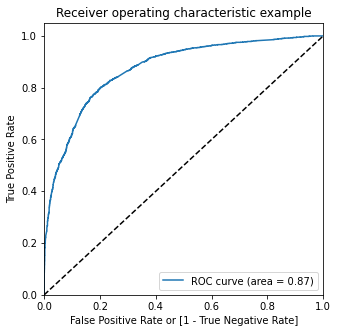

In [76]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

### Finding Optimal Cutoff Point

In [77]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.329512,0,1,1,1,1,0,0,0,0,0,0
1,0,0.134101,0,1,1,0,0,0,0,0,0,0,0
2,1,0.044917,0,1,0,0,0,0,0,0,0,0,0
3,1,0.350047,0,1,1,1,1,0,0,0,0,0,0
4,1,0.970590,1,1,1,1,1,1,1,1,1,1,1


In [78]:
# Now we will calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.574311  0.984179  0.193339
0.2   0.2  0.709931  0.949744  0.487024
0.3   0.3  0.766196  0.899488  0.642301
0.4   0.4  0.794441  0.813402  0.776817
0.5   0.5  0.798252  0.756631  0.836938
0.6   0.6  0.773818  0.651466  0.887543
0.7   0.7  0.749608  0.565845  0.920415
0.8   0.8  0.722708  0.470451  0.957180
0.9   0.9  0.665098  0.323872  0.982266


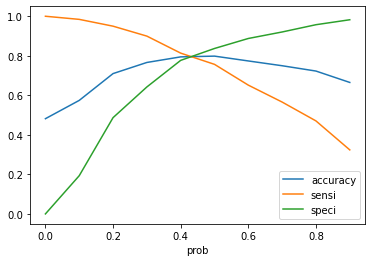

In [79]:
# Now we will plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above,~0.43 is the optimum point to take it as a cutoff probability.

In [80]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,converted,converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.329512,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.134101,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.044917,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.350047,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.970590,1,1,1,1,1,1,1,1,1,1,1,1


In [81]:
# Checking overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7986998430845103

In [82]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[1839,  473],
       [ 425, 1724]], dtype=int64)

In [83]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [84]:
# Now we will check the sensitivity of the model
TP / float(TP+FN)

0.8022335970218707

In [85]:
# Now we will check the specificity
TN / float(TN+FP)

0.7954152249134948

In [86]:
# Checking false postive rate - predicting churn when customer does not have converted
print(FP/ float(TN+FP))

0.2045847750865052


In [87]:
# Checking Positive predictive value 
print (TP / float(TP+FP))

0.7847064178425125


In [88]:
# Checking Negative predictive value
print (TN / float(TN+ FN))

0.8122791519434629


## Precision and Recall

In [89]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[1935,  377],
       [ 523, 1626]], dtype=int64)

##### Precision

In [90]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7566309911586785

In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
?precision_score

In [93]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.8117823265102346

In [94]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7566309911586785

### Precision and recall tradeoff

In [95]:
from sklearn.metrics import precision_recall_curve

In [96]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: predicted, Length: 4461, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

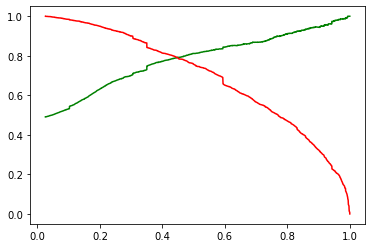

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [99]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [100]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
X_test_sm = sm.add_constant(X_test)

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred[:10]

4771    0.997398
6122    0.125890
9202    0.708835
6570    0.319524
2668    0.445511
4233    0.894553
3368    0.788976
9091    0.514512
5972    0.132170
3631    0.777593
dtype: float64

In [104]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
y_pred_1.head()

,0
4771,0.997398
6122,0.125890
9202,0.708835
6570,0.319524
2668,0.445511


In [106]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [107]:
y_test_df['Prospect ID'] = y_test_df.index

In [108]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.997398
1,0,6122,0.125890
2,0,9202,0.708835
3,1,6570,0.319524
4,1,2668,0.445511


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [112]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4771,0.997398
1,0,6122,0.125890
2,0,9202,0.708835
3,1,6570,0.319524
4,1,2668,0.445511


In [113]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [114]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4771,0.997398,1
1,0,6122,0.125890,0
2,0,9202,0.708835,1
3,1,6570,0.319524,0
4,1,2668,0.445511,1


In [115]:
# Calculating the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7824267782426778

In [116]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[783, 213],
       [203, 713]], dtype=int64)

In [117]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [118]:
# Calculating the sensitivity of the model
TP / float(TP+FN)

0.7783842794759825

In [119]:
# Calculating specificity
TN / float(TN+FP)

0.786144578313253

In [120]:
# Calculating Precision

TP/(TP+FP)

0.7699784017278618

In [122]:
# Calculating the Recall

TP/(TP+FN)

0.7783842794759825

In [127]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_pred_final

,Converted,Prospect ID,Converted_Prob,final_predicted,Lead Score
0,1,4771,0.997398,1,100
1,0,6122,0.125890,0,13
2,0,9202,0.708835,1,71
3,1,6570,0.319524,0,32
4,1,2668,0.445511,1,45
...,...,...,...,...,...
1907,0,5828,0.128734,0,13
1908,1,6583,0.416710,0,42
1909,0,5531,0.713561,1,71
1910,1,3056,0.590059,1,59
